In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

import vaibhap1_logistic_regression_problem2_incomplete

In [514]:
reload(vaibhap1_logistic_regression_problem2_incomplete);
from vaibhap1_logistic_regression_problem2_incomplete import * 

### Toy Problem
you may want to simulate a small 2d data set to test your code (always a good idea to test your code on simulated toy data where you know the solution), e.g., 2 equally likely Gaussians, one with mean (2,2) and one with mean at (4,2), and identity covariance matrices. This should give a solution at x=3. Simulate maybe 100 data points from each class. Since you know the solution you could initialize the algorithm at the (theoretical) solution and the maximum likelihood answer should be pretty close (won't quite be the same as the x=3 solution since its based on a finite amount of data) and the algorithm should not "wander away" from this solution. You could also initialize at suboptimal solutions and check that the log-likelihood is much larger, that the gradient is much larger in magnitude than it is close to the solution, etc.

### Generate data

In [496]:
M = 1000
x_class0 = np.random.normal(loc = 2, scale=0.001, size=(M,1))
x_class1 = np.random.normal(loc = 4, scale=0.001, size=(M,1))

In [497]:
X = np.vstack([x_class0, x_class1])
X = np.hstack([X, np.ones((X.shape[0],1))])
Y = np.vstack([np.zeros((M, 1)), np.ones((M,1))])

print(X[0])
print(Y[0])
print(Y[-1])

[1.999415 1.      ]
[0.]
[1.]


In [498]:
print(X.shape)
print(Y.shape)

(2000, 2)
(2000, 1)


### Train Classifier

In [499]:
B = np.random.normal(scale=.0001, size=(X.shape[1],1))
B.shape

(2, 1)

In [500]:
newBeta, prog = train_logistic_regression_model(X,Y,B,0.0001,M*2,250,False)

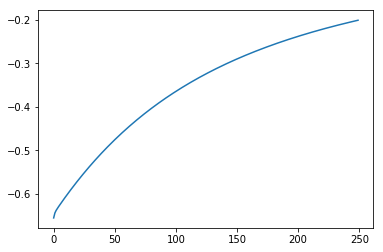

In [501]:
plt.plot(prog)

[[ 1.56070952]
 [-4.30575322]]


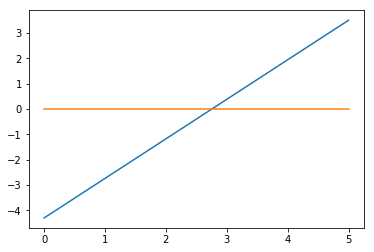

In [502]:
print(newBeta)
x = np.linspace(0, 5)
plt.plot(x, newBeta[0]*x + newBeta[1])
plt.plot(x, 0*x)

# Problem #2: Implementation

## Part 1
Train three logisitc regression models for different learning rates (0.001, 0.01, 0.1)

In [518]:
reload(vaibhap1_logistic_regression_problem2_incomplete);
from vaibhap1_logistic_regression_problem2_incomplete import * 

Validation Accuracies: [0.9788762146176595, 0.9788762146176595, 0.9831009716941276]
Test Accuracy: 0.984856


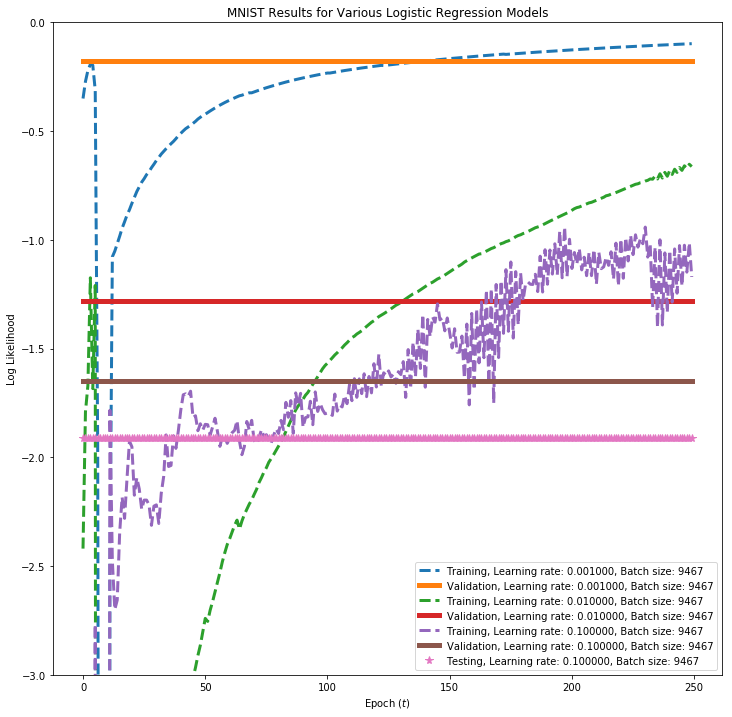

In [476]:
### Load the data
train_x, train_y = load_data_pairs("train")
valid_x, valid_y = load_data_pairs("valid")
test_x, test_y = load_data_pairs("test")

# add a one for the bias term                                                                                                                                                 
train_x = np.hstack([train_x, np.ones((train_x.shape[0],1))])
valid_x = np.hstack([valid_x, np.ones((valid_x.shape[0],1))])
test_x = np.hstack([test_x, np.ones((test_x.shape[0],1))])

### Initialize model parameters
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))

### Set training parameters
#learning_rates = [.0001]
learning_rates =[1e-3, 1e-2, 1e-1]
batch_sizes = [train_x.shape[0]]
max_epochs = 250

### Iterate over training parameters, testing all combinations
valid_ll = []
valid_acc = []
all_params = []
all_train_logs = []

for lr in learning_rates:
    for bs in batch_sizes:
        beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))
        ### train model
        final_params, train_progress = train_logistic_regression_model(train_x, train_y, beta, lr, bs, max_epochs)
        all_params.append(final_params)
        all_train_logs.append((train_progress, "Learning rate: %f, Batch size: %d" %(lr, bs)))

        ### evaluate model on validation data
        valid_ll.append( calc_log_likelihood(valid_x, valid_y, final_params) )
        valid_acc.append( calc_accuracy(valid_x, valid_y, final_params) )

### Get best model
best_model_idx = np.argmax(valid_acc)
best_params = all_params[best_model_idx]
test_ll = calc_log_likelihood(test_x, test_y, best_params) 
test_acc = calc_accuracy(test_x, test_y, best_params) 
print "Validation Accuracies: "+str(valid_acc)
print "Test Accuracy: %f" %(test_acc)

### Plot 
plt.figure(figsize=(12,12))
epochs = range(max_epochs)
for idx, log in enumerate(all_train_logs):
    plt.plot(epochs, log[0], '--', linewidth=3, label="Training, "+log[1])
    plt.plot(epochs, max_epochs*[valid_ll[idx]], '-', linewidth=5, label="Validation, "+log[1])
plt.plot(epochs,  max_epochs*[test_ll], '*', ms=8, label="Testing, "+all_train_logs[best_model_idx][1])

plt.xlabel(r"Epoch ($t$)")
plt.ylabel("Log Likelihood")
plt.ylim([-3, 0.])
plt.title("MNIST Results for Various Logistic Regression Models")
plt.legend(loc=4)
plt.show()

## Part 2 

Validation Accuracies: [0.9856358259400084, 0.9852133502323617, 0.9852133502323617]
Test Accuracy: 0.983812


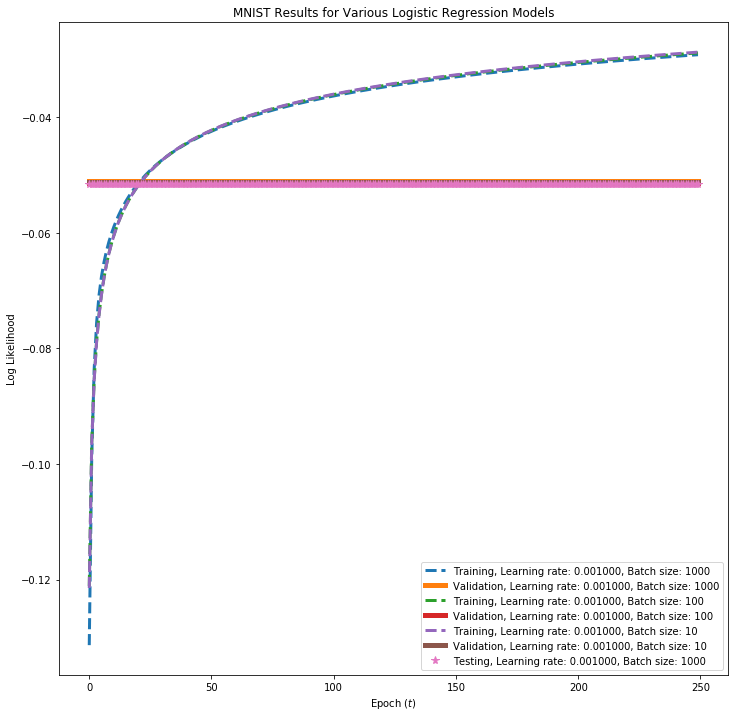

In [531]:
### Load the data
train_x, train_y = load_data_pairs("train")
valid_x, valid_y = load_data_pairs("valid")
test_x, test_y = load_data_pairs("test")

# add a one for the bias term                                                                                                                                                 
train_x = np.hstack([train_x, np.ones((train_x.shape[0],1))])
valid_x = np.hstack([valid_x, np.ones((valid_x.shape[0],1))])
test_x = np.hstack([test_x, np.ones((test_x.shape[0],1))])

### Initialize model parameters
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))

### Set training parameters
#learning_rates = [.0001]
learning_rates =[.001]
batch_sizes = [1000, 100, 10]
max_epochs = 250

### Iterate over training parameters, testing all combinations
valid_ll = []
valid_acc = []
all_params = []
all_train_logs = []

for lr in learning_rates:
    for bs in batch_sizes:
        beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))
        ### train model
        final_params, train_progress = train_logistic_regression_model(train_x, train_y, beta, lr, bs, max_epochs)
        all_params.append(final_params)
        all_train_logs.append((train_progress, "Learning rate: %f, Batch size: %d" %(lr, bs)))

        ### evaluate model on validation data
        valid_ll.append( calc_log_likelihood(valid_x, valid_y, final_params) )
        valid_acc.append( calc_accuracy(valid_x, valid_y, final_params) )

### Get best model
best_model_idx = np.argmax(valid_acc)
best_params = all_params[best_model_idx]
test_ll = calc_log_likelihood(test_x, test_y, best_params) 
test_acc = calc_accuracy(test_x, test_y, best_params) 
print "Validation Accuracies: "+str(valid_acc)
print "Test Accuracy: %f" %(test_acc)

### Plot 
plt.figure(figsize=(12,12))
epochs = range(max_epochs)
for idx, log in enumerate(all_train_logs):
    plt.plot(epochs, log[0], '--', linewidth=3, label="Training, "+log[1])
    plt.plot(epochs, max_epochs*[valid_ll[idx]], '-', linewidth=5, label="Validation, "+log[1])
plt.plot(epochs,  max_epochs*[test_ll], '*', ms=8, label="Testing, "+all_train_logs[best_model_idx][1])

plt.xlabel(r"Epoch ($t$)")
plt.ylabel("Log Likelihood")
# plt.ylim([-3, 0.])
plt.title("MNIST Results for Various Logistic Regression Models")
plt.legend(loc=4)
plt.show()

In [599]:
### Model Training ###

def train_logistic_regression_model(x, y, beta, lr, batch_size, max_epoch=250, lr_schedule=None, verbose=False):
    beta = copy.deepcopy(beta)
    n_batches = x.shape[0]/batch_size
    train_progress = []
    
    
    # For AdaM updates
    adam_values = {'mean': np.zeros(beta.shape), 'var': np.zeros(beta.shape), 't': 0}

    for epoch_idx in xrange(max_epoch):
        for batch_idx in xrange(n_batches):
            x_batch, y_batch = get_batch(x, y, batch_size, batch_idx)
            
            # Calculate Gradient
            beta_grad = x_batch.T.dot(y_batch - run_log_reg_model(x_batch, beta))
            
            #print("grad norm: " + str(np.linalg.norm(beta_grad)))
            
            # perform updates
            if lr_schedule == None:
                beta += lr * beta_grad
            else:
                if lr_schedule == 'AdaM':
                    beta_update = get_AdaM_update(lr, beta_grad, adam_values)
                    beta += beta_update
                elif lr_schedule == 'Robbins_Monro':
                    alpha = Robbins_Monro(lr, epoch_idx)
                    beta += alpha * beta_grad
                elif lr_schedule == "Newton-Raphson":
                    alpha = Newton_Raphson(x_batch, beta)
                    beta += alpha.dot(beta_grad)
                else:
                    raise Exception("Invalid Learning Schedule")
        
        train_progress.append(calc_log_likelihood(x, y, beta))
        if verbose:
            t_hats = run_log_reg_model(x, beta)
            print "Epoch %d.  Train Log Likelihood: %f" %(epoch_idx, train_progress[-1])
            if ((1-t_hats) == 0).sum() > 0:
                print "t_hats == 0 count: " + str((t_hats == 0).sum())
            if ((1-t_hats) == 0).sum() > 0:       
                print "(1 - t_hats) == 0 count: " + str(((1-t_hats) == 0).sum())
            
    return beta, train_progress

In [553]:
def Robbins_Monro(alpha0, epoch_num):
    if epoch_num > 0:
        return alpha0 / epoch_num
    else:
        return alpha0

Epoch 0.  Train Log Likelihood: -0.668501
Epoch 1.  Train Log Likelihood: -0.403609
Epoch 2.  Train Log Likelihood: -0.335968
Epoch 3.  Train Log Likelihood: -0.304649
Epoch 4.  Train Log Likelihood: -0.290465
Epoch 5.  Train Log Likelihood: -0.282491
Epoch 6.  Train Log Likelihood: -0.268983
Epoch 7.  Train Log Likelihood: -0.258108
Epoch 8.  Train Log Likelihood: -0.249108
Epoch 9.  Train Log Likelihood: -0.244615
Epoch 10.  Train Log Likelihood: -0.241227
Epoch 11.  Train Log Likelihood: -0.235474
Epoch 12.  Train Log Likelihood: -0.230456
Epoch 13.  Train Log Likelihood: -0.225974
Epoch 14.  Train Log Likelihood: -0.221938
Epoch 15.  Train Log Likelihood: -0.221335
Epoch 16.  Train Log Likelihood: -0.217975
Epoch 17.  Train Log Likelihood: -0.214881
Epoch 18.  Train Log Likelihood: -0.212012
Epoch 19.  Train Log Likelihood: -0.209345
Epoch 20.  Train Log Likelihood: -0.206786
Epoch 21.  Train Log Likelihood: -0.204454
Epoch 22.  Train Log Likelihood: -0.202262
Epoch 23.  Train Log 

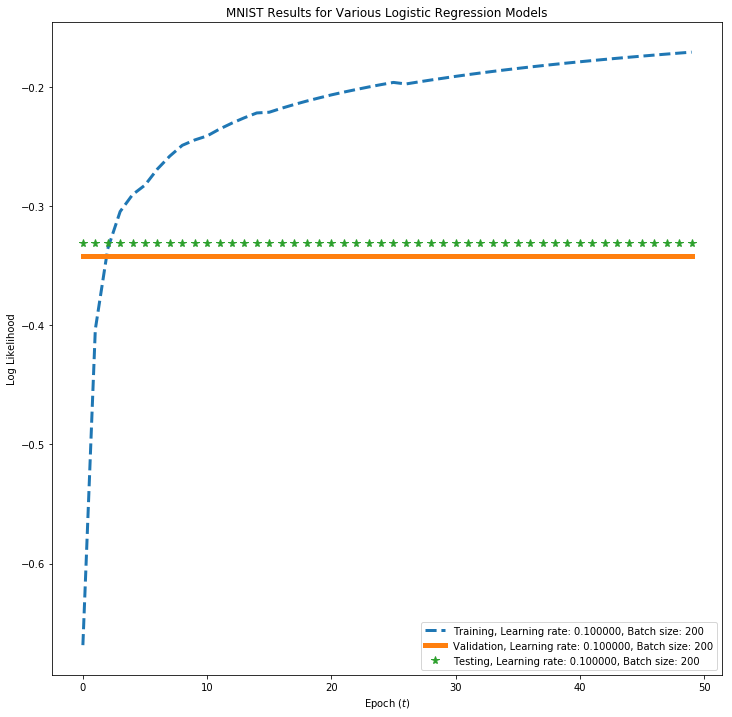

In [555]:
### Load the data
train_x, train_y = load_data_pairs("train")
valid_x, valid_y = load_data_pairs("valid")
test_x, test_y = load_data_pairs("test")

# add a one for the bias term                                                                                                                                                 
train_x = np.hstack([train_x, np.ones((train_x.shape[0],1))])
valid_x = np.hstack([valid_x, np.ones((valid_x.shape[0],1))])
test_x = np.hstack([test_x, np.ones((test_x.shape[0],1))])

### Initialize model parameters
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))

### Set training parameters
bs = 200
max_epochs = 50

### Iterate over training parameters, testing all combinations
valid_ll = []
valid_acc = []
all_params = []
all_train_logs = []

# ================= Robbins Monro Update ========================
lr = 0.1
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))
### train model
final_params, train_progress = train_logistic_regression_model(train_x, train_y, beta, lr, bs, max_epochs, lr_schedule="Robbins_Monro", verbose=True)
all_params.append(final_params)
all_train_logs.append((train_progress, "Learning rate: %f, Batch size: %d" %(lr, bs)))

### evaluate model on validation data
valid_ll.append( calc_log_likelihood(valid_x, valid_y, final_params) )
valid_acc.append( calc_accuracy(valid_x, valid_y, final_params) )


### Get best model
best_model_idx = np.argmax(valid_acc)
best_params = all_params[best_model_idx]
test_ll = calc_log_likelihood(test_x, test_y, best_params) 
test_acc = calc_accuracy(test_x, test_y, best_params) 
print "Validation Accuracies: "+str(valid_acc)
print "Test Accuracy: %f" %(test_acc)

### Plot 
plt.figure(figsize=(12,12))
epochs = range(max_epochs)
for idx, log in enumerate(all_train_logs):
    plt.plot(epochs, log[0], '--', linewidth=3, label="Training, "+log[1])
    plt.plot(epochs, max_epochs*[valid_ll[idx]], '-', linewidth=5, label="Validation, "+log[1])
plt.plot(epochs,  max_epochs*[test_ll], '*', ms=8, label="Testing, "+all_train_logs[best_model_idx][1])

plt.xlabel(r"Epoch ($t$)")
plt.ylabel("Log Likelihood")
# plt.ylim([-3, 0.])
plt.title("MNIST Results for Various Logistic Regression Models")
plt.legend(loc=4)
plt.show()

In [546]:
def get_AdaM_update(alpha_0, grad, adam_values, b1=0.95, b2=0.999, e=1e-8):
    adam_values['t'] += 1
    
    # update mean
    adam_values['mean'] = b1 * adam_values['mean'] + (1-b1) * grad
    m_hat = adam_values['mean'] / (1-b1**adam_values['t'])

    # update variance
    adam_values['var'] = b2 * adam_values['var'] + (1-b2) * grad**2
    v_hat = adam_values['var'] / (1-b2**adam_values['t'])

    return alpha_0 * m_hat/(np.sqrt(v_hat) + e)

Epoch 0.  Train Log Likelihood: -0.291496
Epoch 1.  Train Log Likelihood: -0.186229
Epoch 2.  Train Log Likelihood: -0.146972
Epoch 3.  Train Log Likelihood: -0.125819
Epoch 4.  Train Log Likelihood: -0.112070
Epoch 5.  Train Log Likelihood: -0.102223
Epoch 6.  Train Log Likelihood: -0.094739
Epoch 7.  Train Log Likelihood: -0.088812
Epoch 8.  Train Log Likelihood: -0.083971
Epoch 9.  Train Log Likelihood: -0.079920
Epoch 10.  Train Log Likelihood: -0.076466
Epoch 11.  Train Log Likelihood: -0.073474
Epoch 12.  Train Log Likelihood: -0.070848
Epoch 13.  Train Log Likelihood: -0.068519
Epoch 14.  Train Log Likelihood: -0.066433
Epoch 15.  Train Log Likelihood: -0.064552
Epoch 16.  Train Log Likelihood: -0.062842
Epoch 17.  Train Log Likelihood: -0.061280
Epoch 18.  Train Log Likelihood: -0.059844
Epoch 19.  Train Log Likelihood: -0.058519
Epoch 20.  Train Log Likelihood: -0.057290
Epoch 21.  Train Log Likelihood: -0.056146
Epoch 22.  Train Log Likelihood: -0.055079
Epoch 23.  Train Log 

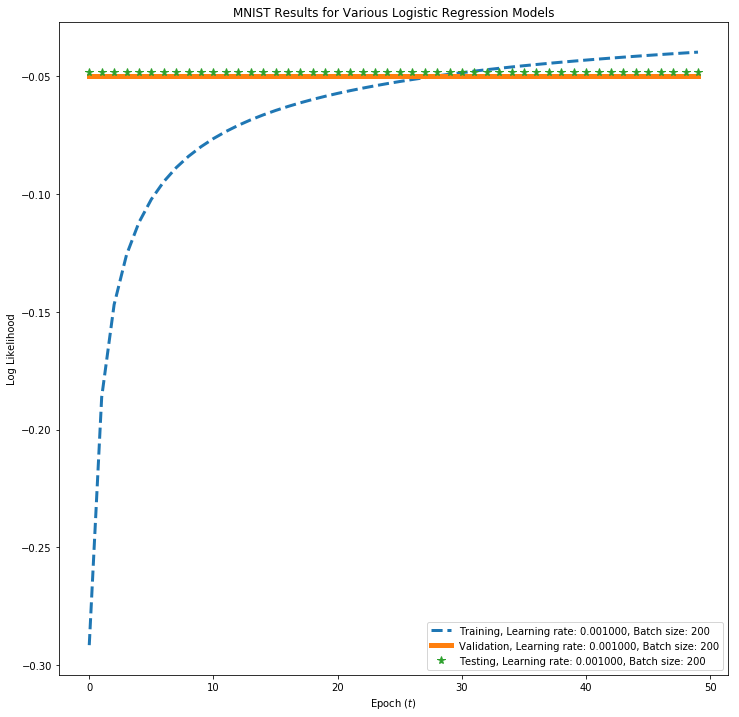

In [549]:
### Load the data
train_x, train_y = load_data_pairs("train")
valid_x, valid_y = load_data_pairs("valid")
test_x, test_y = load_data_pairs("test")

# add a one for the bias term                                                                                                                                                 
train_x = np.hstack([train_x, np.ones((train_x.shape[0],1))])
valid_x = np.hstack([valid_x, np.ones((valid_x.shape[0],1))])
test_x = np.hstack([test_x, np.ones((test_x.shape[0],1))])

### Initialize model parameters
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))

### Set training parameters
bs = 200
max_epochs = 50

### Iterate over training parameters, testing all combinations
valid_ll = []
valid_acc = []
all_params = []
all_train_logs = []

# ===================== AdaM Update ==========================
lr = 0.001
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))
### train model
final_params, train_progress = train_logistic_regression_model(train_x, train_y, beta, lr, bs, max_epochs, lr_schedule="AdaM", verbose=True)
all_params.append(final_params)
all_train_logs.append((train_progress, "Learning rate: %f, Batch size: %d" %(lr, bs)))

### evaluate model on validation data
valid_ll.append( calc_log_likelihood(valid_x, valid_y, final_params) )
valid_acc.append( calc_accuracy(valid_x, valid_y, final_params) )


# ================= Robbins Monro Update ========================


### Get best model
best_model_idx = np.argmax(valid_acc)
best_params = all_params[best_model_idx]
test_ll = calc_log_likelihood(test_x, test_y, best_params) 
test_acc = calc_accuracy(test_x, test_y, best_params) 
print "Validation Accuracies: "+str(valid_acc)
print "Test Accuracy: %f" %(test_acc)

### Plot 
plt.figure(figsize=(12,12))
epochs = range(max_epochs)
for idx, log in enumerate(all_train_logs):
    plt.plot(epochs, log[0], '--', linewidth=3, label="Training, "+log[1])
    plt.plot(epochs, max_epochs*[valid_ll[idx]], '-', linewidth=5, label="Validation, "+log[1])
plt.plot(epochs,  max_epochs*[test_ll], '*', ms=8, label="Testing, "+all_train_logs[best_model_idx][1])

plt.xlabel(r"Epoch ($t$)")
plt.ylabel("Log Likelihood")
# plt.ylim([-3, 0.])
plt.title("MNIST Results for Various Logistic Regression Models")
plt.legend(loc=4)
plt.show()

In [602]:
def Newton_Raphson(X, beta):
    # Compute A
    theta_hat = run_log_reg_model(X, beta)
    A = np.diag(theta_hat.squeeze())
    
    H = X.T.dot(A).dot(X)
    return np.linalg.pinv(H)
    

Epoch 0.  Train Log Likelihood: -3.792851
Epoch 1.  Train Log Likelihood: -3.567799
Epoch 2.  Train Log Likelihood: -3.551043
Epoch 3.  Train Log Likelihood: -3.291491
Epoch 4.  Train Log Likelihood: -3.149349
Epoch 5.  Train Log Likelihood: -3.147333
Epoch 6.  Train Log Likelihood: -3.130223
Epoch 7.  Train Log Likelihood: -3.073400
Epoch 8.  Train Log Likelihood: -3.115448
Epoch 9.  Train Log Likelihood: -3.104765
Epoch 10.  Train Log Likelihood: -3.002415
Epoch 11.  Train Log Likelihood: -2.981987
Epoch 12.  Train Log Likelihood: -2.962619
Epoch 13.  Train Log Likelihood: -2.998408
Epoch 14.  Train Log Likelihood: -3.047029
Epoch 15.  Train Log Likelihood: -2.918515
Epoch 16.  Train Log Likelihood: -2.926554
Epoch 17.  Train Log Likelihood: -2.882037
Epoch 18.  Train Log Likelihood: -2.940614
Epoch 19.  Train Log Likelihood: -2.850666
Epoch 20.  Train Log Likelihood: -2.829509
Epoch 21.  Train Log Likelihood: -2.853963
Epoch 22.  Train Log Likelihood: -2.846377
Epoch 23.  Train Log 

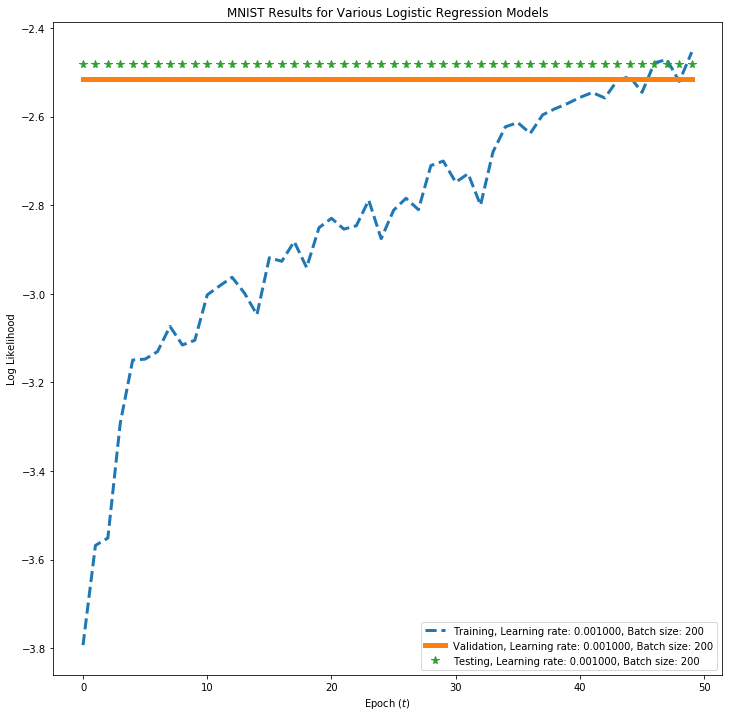

In [603]:
### Load the data
train_x, train_y = load_data_pairs("train")
valid_x, valid_y = load_data_pairs("valid")
test_x, test_y = load_data_pairs("test")

# add a one for the bias term                                                                                                                                                 
train_x = np.hstack([train_x, np.ones((train_x.shape[0],1))])
valid_x = np.hstack([valid_x, np.ones((valid_x.shape[0],1))])
test_x = np.hstack([test_x, np.ones((test_x.shape[0],1))])

### Initialize model parameters
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))

### Set training parameters
bs = 200
max_epochs = 50

### Iterate over training parameters, testing all combinations
valid_ll = []
valid_acc = []
all_params = []
all_train_logs = []

# ===================== Newton-Raphson ==========================
lr = 0.01
beta = np.random.normal(scale=.0001, size=(train_x.shape[1],1))
### train model
final_params, train_progress = train_logistic_regression_model(train_x, train_y, beta, lr, bs, max_epochs, lr_schedule="Newton-Raphson", verbose=True)
all_params.append(final_params)
all_train_logs.append((train_progress, "Learning rate: %f, Batch size: %d" %(lr, bs)))

### evaluate model on validation data
valid_ll.append( calc_log_likelihood(valid_x, valid_y, final_params) )
valid_acc.append( calc_accuracy(valid_x, valid_y, final_params) )


### Get best model
best_model_idx = np.argmax(valid_acc)
best_params = all_params[best_model_idx]
test_ll = calc_log_likelihood(test_x, test_y, best_params) 
test_acc = calc_accuracy(test_x, test_y, best_params) 
print "Validation Accuracies: "+str(valid_acc)
print "Test Accuracy: %f" %(test_acc)

### Plot 
plt.figure(figsize=(12,12))
epochs = range(max_epochs)
for idx, log in enumerate(all_train_logs):
    plt.plot(epochs, log[0], '--', linewidth=3, label="Training, "+log[1])
    plt.plot(epochs, max_epochs*[valid_ll[idx]], '-', linewidth=5, label="Validation, "+log[1])
plt.plot(epochs,  max_epochs*[test_ll], '*', ms=8, label="Testing, "+all_train_logs[best_model_idx][1])

plt.xlabel(r"Epoch ($t$)")
plt.ylabel("Log Likelihood")
# plt.ylim([-3, 0.])
plt.title("MNIST Results for Various Logistic Regression Models")
plt.legend(loc=4)
plt.show()